In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
file2 = r"C:\Users\PcLaptop\Documents\GitHub\APlanet\Pilot_2\Rearrange_datasets\all_Madrid.xlsx"

xl2= pd.ExcelFile(file2)      # Load spreadsheet
df2 = xl2.parse('Sheet1')    # Load a sheet into a DataFrame by name: df1
df2.index  = np.arange(len(df2))
df=df2

In [3]:
df=df.rename(columns={"player.HH": "High EE High NE","player.HL": "High EE Low NE", "player.LH": "Low EE High NE","player.LL": "Low EE Low NE"})

In [4]:
df['treatment'].unique()

array(['Baseline', 'Pollution', 'Public Services', 'Road Pricing',
       'Social Norm'], dtype=object)

In [5]:
Baseline = df[df['treatment']=='Baseline']
Pollution = df[df['treatment']=='Pollution']
Public_Services = df[df['treatment']=='Public Services']
Road_Pricing = df[df['treatment']=='Road Pricing']
Social_Norm = df[df['treatment']=='Social Norm']

In [6]:
len(Baseline), len(Pollution), len(Public_Services), len(Road_Pricing), len(Social_Norm)

(95, 93, 105, 94, 96)

In [7]:
def bar1(d):
    d.index  = np.arange(len(d))
    x=pd.DataFrame( index=[0,1])
    for i in [237,239,241,243]:
        column= d.columns[i]
        aa=d.groupby([column]).count()['treatment']
        per=0
        s=0
        dev=0
        for j in aa.index:
            per=per+j*aa[j]
            s=s+aa[j]
        x.at[0,column] = per/s
        for j in aa.index:  
            dev=dev+(aa[j]*(j-x.at[0,column])**2)
        x.at[1,column] = np.sqrt(dev/s)
        
    return x

In [8]:
def bar(d):
    d.index  = np.arange(len(d))
    x=pd.DataFrame( index=[0,1])
    for i in [237,239,241,243]:
        column= d.columns[i]
        x.at[0,column] = d[column].mean()
        x.at[1,column] = d[column].std()/np.sqrt(len(d[column]))    
    return x

In [10]:
df=df.rename(columns={"How much do you agree with the following statements from 1 to 7, where 1 means ‘I completely disagree’ and 7 means ‘I completely agree’? Air pollution derived by cars is one of the major causes of premature death in Europe:": r"$\bf{Air }$ "+r"$\bf{pollution}$ "+"derived by cars\nis one of the major causes\nof premature death in Europe","The introduction of policies such as road pricing will alleviate congestion problems:":"The introduction of policies\nsuch as "+r"$\bf{road }$ "+r"$\bf{pricing}$ "+"will\nalleviate congestion problems","Revenues collected through taxes are used to create a well-functioning welfare state and society:": r"$\bf{Revenues}$ "+"collected through taxes\nare used to create a well-functioning\nwelfare state and society","Tax revenues should be used to help those who are more in need:": r"$\bf{Tax}$ "+"revenues should\nbe used to help those\nwho are more in need"})

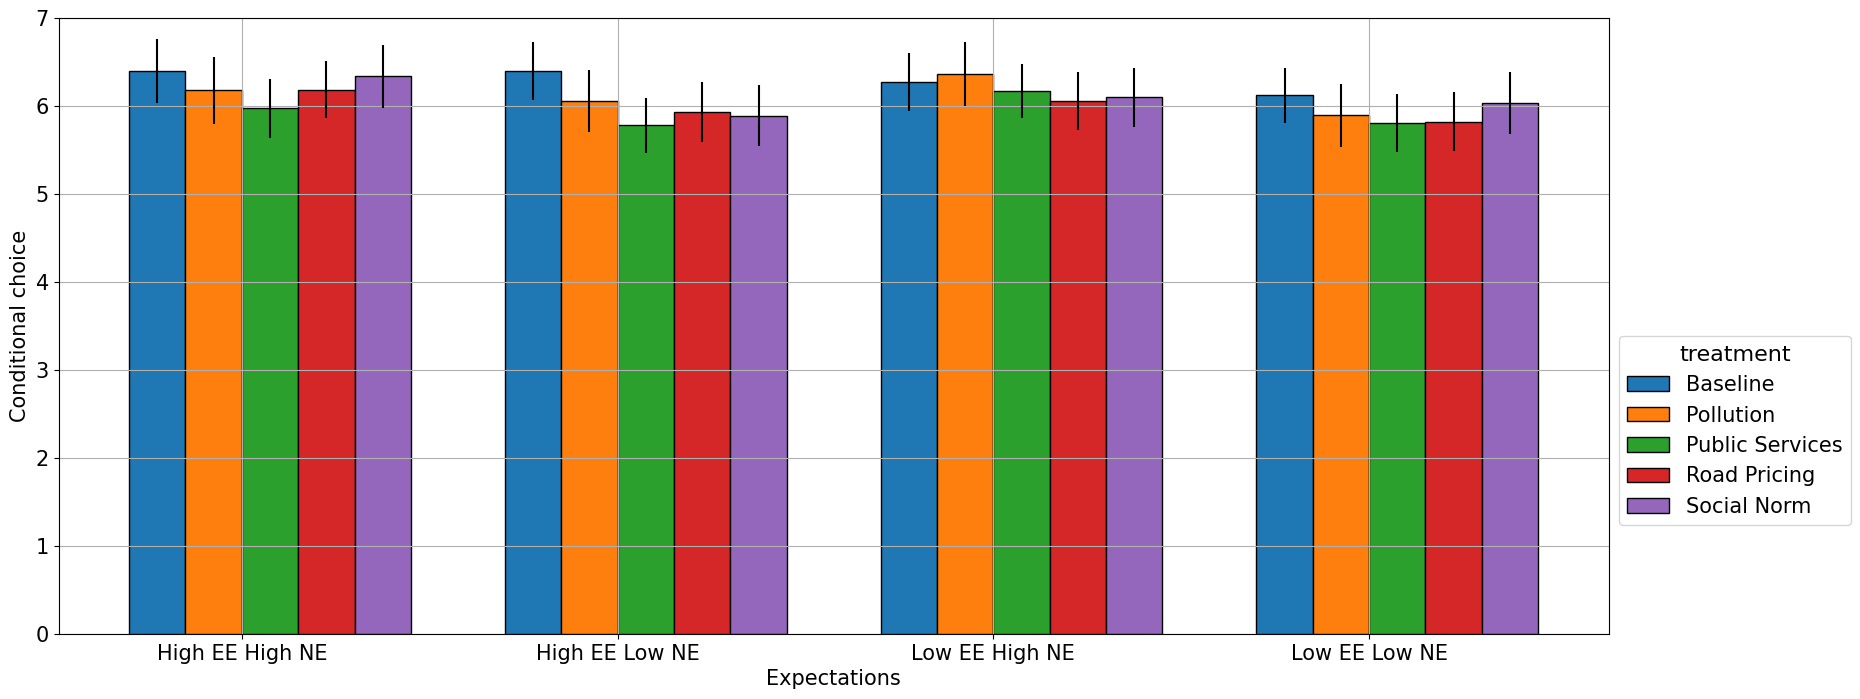

In [29]:
fig=plt.figure(figsize=(20,8))
ind = np.arange(4)
width = 0.15

plt.bar(ind, bar(Baseline).loc[0][:], yerr=bar(Baseline).loc[1][:], width=width, edgecolor='k', label='Baseline')
plt.bar(ind+width, bar(Pollution).loc[0][:], yerr=bar(Pollution).loc[1][:], width=width, edgecolor='k', label='Pollution')
plt.bar(ind+2*width, bar(Public_Services).loc[0][:], yerr=bar(Public_Services).loc[1][:], width=width, edgecolor='k', label='Public Services')
plt.bar(ind+3*width, bar(Road_Pricing).loc[0][:], yerr=bar(Road_Pricing).loc[1][:], width=width, edgecolor='k', label='Road Pricing')
plt.bar(ind+4*width, bar(Social_Norm).loc[0][:], yerr=bar(Social_Norm).loc[1][:], width=width, edgecolor='k', label='Social Norm')


plt.xticks([r + width*3/2 for r in range(4)], df[["High EE High NE", "High EE Low NE", "Low EE High NE", "Low EE Low NE"]], fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Expectations', fontsize=15)
plt.ylabel('Conditional choice', fontsize=15)
plt.ylim([0,7])
leg=plt.legend(loc='best', bbox_to_anchor=(1, 0.5),fontsize=15)
leg.set_title('treatment',prop={'size':16})
#plt.tight_layout(pad=2,w_pad=8, h_pad=3)
plt.grid()
#plt.savefig(r'C:\Users\Sara\Dropbox (Politecnico Di Torino Studenti)\Aplanet_\bars\agree.png')

plt.show()